# *Counselors of Real Estate* Top Ten Issues
## Issue 1: Mixed Macroeconomic Signals

## Timothy H. Savage, Ph.D. CRE
### NYU Schack Institute of Real Estate
### Chief Economist | Haystacks.AI

In [1]:
%matplotlib inline
from IPython.display import Image
import urllib.request as url
import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma
import patsy
from statsmodels.graphics.api import abline_plot
import numpy.linalg as linalg
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)

import datetime as dt
from fredapi import Fred
fred = Fred(api_key='30e6ecb242a73869e11cb35f6aa3afc3')

## June 2020
* Q2 2020 GDP contraction much larger than global financial crisis.
* 10-year U.S. Treasury had fallen to ~50 bps.
* NBER formally declares the U.S. to be in a recession. 

## The Current Economic Cycle (2021 - ?)

* Jay Powell's soft landing.
    * Recession highly improbable for H2 2023.
    * Increasingly improbable for 2024.
    * Labor market performance remains strong.  
    * Slow but steady real growth.
    * Inflation moderating.
    * Post-pandemic consumption distortions clearing.

## But...

* Four large banks have failed this year (including CS).
* Real estate lending by regional banks is worrisome.
* The yield curve is steeply inverted.
* War continues to rage in Ukraine.
* Slowing Chinese economy and troubed property markets.

## Whither Cap Rates?

* Early in the pandemic, I forecast cap rates would **compress**.
    * Fed's monetary reaction (FFR and debt purchases).
* All of these factors **have reversed**.  
* There is now upward pressure on cap rates.
    * Reinforced by the difficulties in B/C office markets.

In [2]:
ten_year = fred.get_series("DGS10", observation_start='1990-01-01').dropna()
one_year = fred.get_series("DGS1", observation_start='1990-01-01').dropna()
three_month = fred.get_series("DGS3MO", observation_start='1990-01-01').dropna()
yield_curve = fred.get_series("T10Y3M", observation_start='1990-01-01').dropna()
growth = fred.get_series("A191RL1Q225SBEA", observation_start='2000-01-01').dropna()

df = {}
df['Durables'] = fred.get_series("PCEDG", observation_start='2019-01-01').dropna()
df['Non-Durables'] = fred.get_series("PCEND", observation_start='2019-01-01').dropna()
df = pd.DataFrame(df)
df = df.pct_change(periods=1).dropna() * 100
colors = (["darkred", "darkblue"])

claims = fred.get_series("ICSA", observation_start='2020-01-01')
jobs = fred.get_series("PAYEMS", observation_start='2020-01-01')
inflation = fred.get_series("PCETRIM12M159SFRBDAL").dropna()

Text(0, 0.5, 'Thousands of Adults')

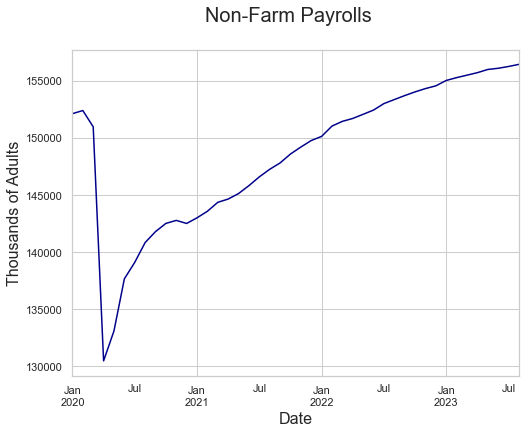

In [3]:
jobs.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Non-Farm Payrolls', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Thousands of Adults', fontsize=16)

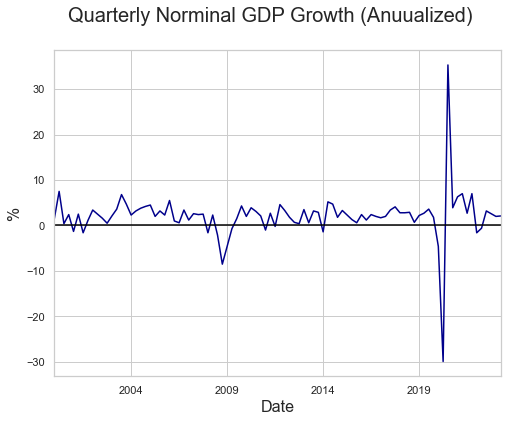

In [4]:
growth.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Quarterly Norminal GDP Growth (Anuualized)', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(0, color='black')

Text(0, 0.5, '%')

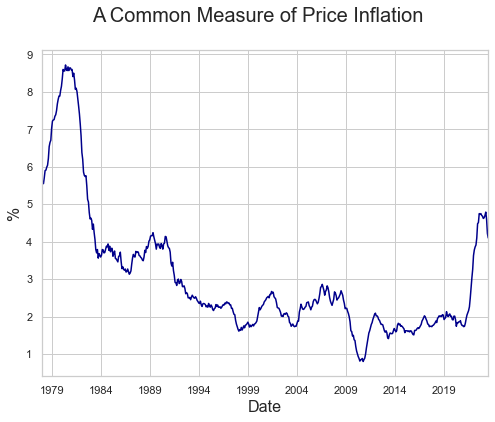

In [5]:
inflation.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('A Common Measure of Price Inflation', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)

Text(0, 0.5, '%')

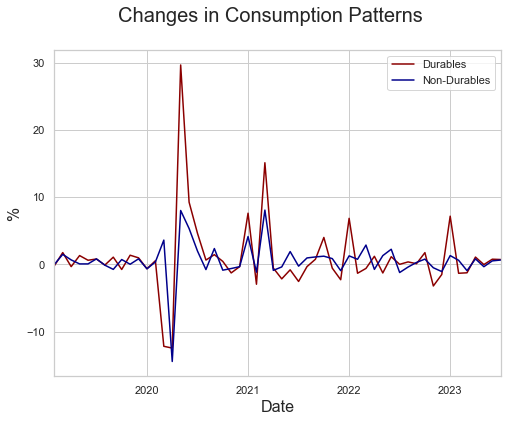

In [6]:
df.plot(figsize=(8, 6), color = colors)
plt.suptitle('Changes in Consumption Patterns', fontsize=20)
plt.legend()
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)

Text(0, 0.5, '%')

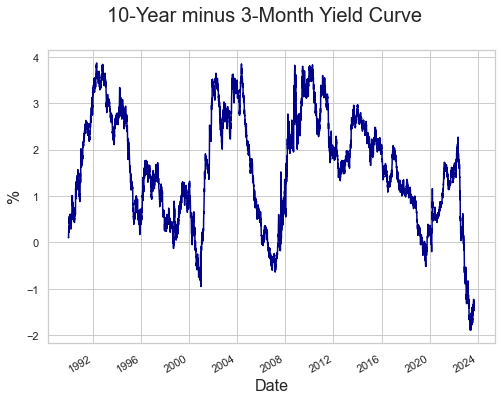

In [7]:
yield_curve.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('10-Year minus 3-Month Yield Curve', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)